In [60]:
# stack (into time series) and seperate (different bands) the tif images of NDVI EVI from MODIS
# 
from osgeo import gdal
import numpy as np
import glob
import xarray as xr
import pandas as pd
# ds = gdal.Open('/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-02-18.tif')
# for bi in range(ds.RasterCount):
#     band = ds.GetRasterBand(bi + 1)
#     # Read this band into a 2D NumPy array
#     ar = band.ReadAsArray()
#     print('Band %d has type %s'%(bi + 1, ar.dtype))
#     raw = ar.tostring()


In [61]:
# outvrt = '/g/data/oe9/user/rg6346/STACT_TIF/stacked.vrt' #/vsimem is special in-memory virtual "directory"
# outtif = '/g/data/oe9/user/rg6346/STACT_TIF/stacked.tif'

# dir = '/g/data/oe9/user/rg6346/NDVI_16D_500M/'
# tifs = glob.glob('/home/599/rg6346/Downloads/MODIS_NDVI_EVI/*.tif')
# tifs
tifs = glob.glob('/g/data/oe9/user/rg6346/NDVI_16D_500M/*.tif')
tifs
# outds = gdal.BuildVRT(outvrt, tifs, separate=True)
# outds = gdal.Translate(outtif, outds)

# xr.concat(xr.open_dataset(tifs[0]))

['/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2002-09-30.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2009-12-19.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2006-04-07.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2010-06-10.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2003-10-16.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2012-10-31.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2005-01-01.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2010-05-09.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-12-02.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2007-07-28.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2010-08-13.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2006-05-09.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-05-08.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500

In [62]:
import gdal, ogr, os, osr
import numpy as np


def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):
    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]
    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Byte)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(4326)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()


def main(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):
    reversed_arr = array[::-1] # reverse array so the tif looks like the array
    array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,reversed_arr) # convert array to raster

In [ ]:
for tif in tifs:
#     print(tif)
    a=xr.open_rasterio(tif)
    for band in [1,2]:
        aa=a.isel(band=band)
#         print(aa)
        dirstr = '/g/data/oe9/user/rg6346/STACT_TIF'
        name_ndvi=dirstr +'/NDVI-'+str(band)+'-'+tif.split('_')[5]
#         print(name_ndvi)
        array2raster(rasterOrigin=[138.6,-24.59],pixelHeight=0.004162008945837755,pixelWidth=0.004162008945837755,newRasterfn=name_ndvi,array=aa.values)
    

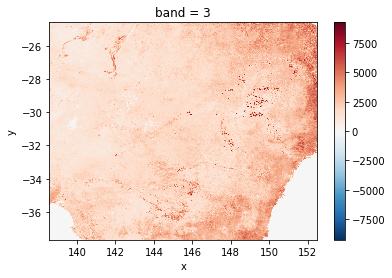

In [52]:
# plot the last band in the last tif file
%matplotlib inline
aa.plot()

In [44]:
tifs[0].split('_')[5]+str(1)

'2000-02-18.tif1'

In [40]:
a=xr.open_rasterio(tifs[0])

In [25]:
a=all_tifs.isel(band=1,concat_dims=1)
aa=a.values
aa.shape


(3147, 3346)

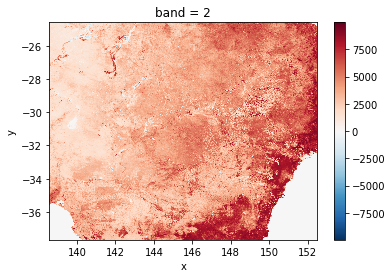

In [28]:
%matplotlib inline
a.plot()

In [26]:
array2raster(rasterOrigin=[138.6,-24.59],pixelHeight=0.004162008945837755,pixelWidth=0.004162008945837755,newRasterfn='test.tif',array=aa)

In [6]:
tifs

['/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-02-18.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-03-05.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-03-21.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-04-06.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-04-22.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-05-24.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-05-08.tif']

In [7]:
dates = [f.rstrip('.tif')[-10:] for f in tifs]
dates = pd.to_datetime(dates, format='%Y-%m-%d')
dates.name = 'time'
dates

DatetimeIndex(['2000-02-18', '2000-03-05', '2000-03-21', '2000-04-06',
               '2000-04-22', '2000-05-24', '2000-05-08'],
              dtype='datetime64[ns]', name='time', freq=None)

In [8]:
all_tifs = xr.concat([xr.open_rasterio(tif) for tif in tifs], dim=dates)
all_tifs

<xarray.DataArray (time: 7, band: 3, y: 3147, x: 3346)>
array([[[[  63, ...,    0],
         ..., 
         [   0, ...,    0]],

        ..., 
        [[1014, ...,    0],
         ..., 
         [   0, ...,    0]]],


       ..., 
       [[[ 129, ...,    0],
         ..., 
         [   0, ...,    0]],

        ..., 
        [[1097, ...,    0],
         ..., 
         [   0, ...,    0]]]], dtype=int16)
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * x        (x) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Attributes:
    crs:        +init=epsg:4326
    res:        (0.004162008945837755, 0.004162008945837755)
    is_tiled:   1
    transform:  (0.004162008945837755, 0.0, 138.5657638337764, 0.0, -0.004162...

In [10]:
# import phenology
# from PIL import Image, ImageOps
# import numpy as np
# import matplotlib.pyplot as plt
# from datetime import datetime, timedelta